# Data analysis and interpretation


In [ ]:
import pandas as pd
import numpy



file=pd.read_csv('Alcohol.csv', sep=r'\s*,\s*',header=0, encoding='ascii', engine='python')

In [15]:
#S2AQ21A HOW OFTEN DRANK ANY ALCOHOL DURING PERIOD OF HEAVIEST DRINKING
#S1Q2A LIVED WITH AT LEAST 1 BIOLOGICAL PARENT BEFORE AGE 18
#S1Q2B BIOLOGICAL FATHER EVER LIVE IN HOUSEHOLD BEFORE RESPONDENT WAS 18
#S1Q2C1 RAISED BY ADOPTIVE PARENTS BEFORE AGE 18
#S1Q2C3 RAISED BY FOSTER PARENTS BEFORE AGE 18
#S1Q2C4 RAISED IN AN INSTITUTION BEFORE AGE 18
#S1Q6A HIGHEST GRADE OR YEAR OF SCHOOL COMPLETED

#Select columns

df=file[['S2AQ21A','S1Q2A','S1Q2B','S1Q2C1','S1Q2C3','S1Q2C4','S1Q6A']]

In [16]:
#rename columns
df=df.rename(columns={'S2AQ21A':'alcoholic_score','S1Q6A':'school_level'})


In [17]:
#eliminate Nan Values and type modifications
import numpy as np
df.alcoholic_score= df.alcoholic_score.replace(r'^\s*$', np.nan, regex=True)
df.school_level= df.school_level.replace(r'^\s*$', np.nan, regex=True)
df = df[df['alcoholic_score'].notna()]
df = df[df['school_level'].notna()]
df['alcoholic_score']=df['alcoholic_score'].astype(int)


In [18]:
alcolist=df[df['alcoholic_score']<4].count()
print('total number of alcolist')
print(alcolist[0])

total number of alcolist
10302


In [19]:
#percentage of alcolist with lower school instruction
a=df[(df['alcoholic_score']<4)&(df['school_level']<8)].count()
#percentage of alcolist with medium school instruction
b=df[(df['alcoholic_score']<4)&(df['school_level']>7)&(df['school_level']<12)].count()
#percentage of alcolist with upper school instruction
c=df[(df['alcoholic_score']<4)&(df['school_level']>11)].count()

print('percentage of each group')
print((a[0],b[0],c[0])/alcolist[0])

percentage of each group
[0.13754611 0.58930305 0.27315084]


In [20]:
#people with familiar problems

d=df[(df['S1Q2A']==2)&(df['alcoholic_score']<4)].count()
e=df[(df['S1Q2B']==2)&(df['alcoholic_score']<4)].count()
f=df[(df['S1Q2C1']==1)&(df['alcoholic_score']<4)].count()
g=df[(df['S1Q2C3']==1)&(df['alcoholic_score']<4)].count()
h=df[(df['S1Q2C4']==1)&(df['alcoholic_score']<4)].count()

print('total number of S1Q2A,S2Q2B,S1Q2C1,S1Q2C3,S2Q2C4')
print(d[0],e[0],f[0],g[0],h[0])
print('percentages of S1Q2A,S2Q2B,S1Q2C1,S1Q2C3,S2Q2C4')
print((d[0],e[0],f[0],g[0],h[0])/alcolist[0])

total number of S1Q2A,S2Q2B,S1Q2C1,S1Q2C3,S2Q2C4
272 1145 121 26 11
percentages of S1Q2A,S2Q2B,S1Q2C1,S1Q2C3,S2Q2C4
[0.02640264 0.11114347 0.01174529 0.00252378 0.00106775]


In [21]:
#childrens which LIVED WITH AT LEAST 1 BIOLOGICAL PARENT BEFORE AGE 18
# or which BIOLOGICAL FATHER EVER LIVE IN HOUSEHOLD BEFORE RESPONDENT WAS 18  
#it is a categorical value so I add the variables in a logical way: or condition will give me the childrens raised in previous conditions
f=df[(df['S1Q2A']==2)|(df['S1Q2B']==2)].count()
g=df[((df['S1Q2A']==2)|(df['S1Q2B']==2) )& (df['alcoholic_score']<4)].count()
print('childrens with this conditions:',f[0])
print('childrens with this conditions who became alcolist:',g[0])
print('percentage of children with this conditins who became alcolist:',g[0]/f[0])
print('percentage on tatal numer of alcolist:',g[0]/alcolist[0])


childrens with this conditions: 4720
childrens with this conditions who became alcolist: 1417
percentage of children with this conditins who became alcolist: 0.30021186440677966
percentage on tatal numer of alcolist: 0.13754610755193167


In [22]:
df['alcoholic_score'].describe()

count    34827.000000
mean         6.746892
std         11.470926
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         99.000000
Name: alcoholic_score, dtype: float64

Text(0.5, 1.0, 'TOTAL ALCOHOLIC SCORE')

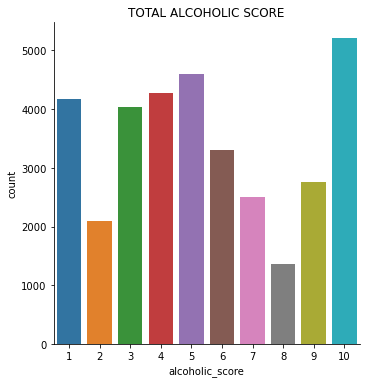

In [23]:
import seaborn
import matplotlib.pyplot as plt

grouped=df.groupby('alcoholic_score').size().reset_index(name='count')
grouped=grouped.drop([10],axis=0)
seaborn.catplot(x="alcoholic_score",y="count",data=grouped,kind="bar")
plt.xlabel('alcoholic_score')   
plt.title('TOTAL ALCOHOLIC SCORE')

# Data Analysis Tools

## Week1

In [24]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi


In [53]:
#variable and covariate:
#S2AQ21A HOW OFTEN DRANK ANY ALCOHOL DURING PERIOD OF HEAVIEST DRINKING
#S1Q1C HISPANIC OR LATINO ORIGIN
#S1Q1D1 "AMERICAN INDIAN OR ALASKA NATIVE" CHECKED IN MULTIRACE CODE
#S1Q1D2 "ASIAN" CHECKED IN MULTIRACE CODE
#S1Q1D3 "BLACK OR AFRICAN AMERICAN" CHECKED IN MULTIRACE CODE
df=file[['S2AQ21A','S1Q1C','S1Q1D1','S1Q1D2','S1Q1D3']]
df=df.rename(columns={'S2AQ21A':'alcoholic_score','S1Q1C':'latino','S1Q1D1':'american','S1Q1D2':'asian','S1Q1D3':'african'})

In [54]:
#Replace missing data
df.alcoholic_score= df.alcoholic_score.replace(r'^\s*$', np.nan, regex=True)
df = df[df['alcoholic_score'].notna()]

df.latino= df.latino.replace(r'^\s*$', np.nan, regex=True)
df = df[df['latino'].notna()]

df.american= df.american.replace(r'^\s*$', np.nan, regex=True)
df = df[df['american'].notna()]

df.asian= df.asian.replace(r'^\s*$', np.nan, regex=True)
df = df[df['asian'].notna()]

df.african= df.african.replace(r'^\s*$', np.nan, regex=True)
df = df[df['african'].notna()]

In [55]:
#rename column

grouped=df.groupby('alcoholic_score').size().reset_index(name='count')
grouped=grouped.drop([10],axis=0)
grouped

,alcoholic_score,count
0,1.0,4167
1,2.0,2095
2,3.0,4040
3,4.0,4277
4,5.0,4600
5,6.0,3309
6,7.0,2502
7,8.0,1367
8,9.0,2759
9,10.0,5215


In [59]:
#F-statistic and p-value--> I reject the null hypothesis and there is no difference in mean
model=smf.ols(formula='alcoholic_score~latino',data=df)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        alcoholic_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     15.04
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           0.000105
Time:                        18:09:29   Log-Likelihood:            -1.3438e+05
No. Observations:               34827   AIC:                         2.688e+05
Df Residuals:                   34825   BIC:                         2.688e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8892      0.301     26.220      0.0

In [60]:
model=smf.ols(formula='alcoholic_score~latino+american+asian+african',data=df)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        alcoholic_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     18.26
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           5.34e-15
Time:                        18:11:35   Log-Likelihood:            -1.3435e+05
No. Observations:               34827   AIC:                         2.687e+05
Df Residuals:                   34822   BIC:                         2.688e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9068      1.179      8.400      0.0

In [77]:
#post hoc comparison--> reject all the null hypothesis
mc1=multi.MultiComparison(df['alcoholic_score'],df['latino'])
res1=mc1.tukeyhsd()
print(res1.summary())

mc1=multi.MultiComparison(df['alcoholic_score'],df['american'])
res1=mc1.tukeyhsd()
print(res1.summary())

mc1=multi.MultiComparison(df['alcoholic_score'],df['asian'])
res1=mc1.tukeyhsd()
print(res1.summary())

mc1=multi.MultiComparison(df['alcoholic_score'],df['african'])
res1=mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  -0.6262 0.001 -0.9427 -0.3097   True
---------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   1.3086 0.001 0.6026 2.0147   True
-------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -1.1139 0.0057 -1.9027 -0.325   True
---------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  -0.7847 0.001 -1.0948 -0.4746   True
--------------------

## Week 2: X^2 Test of Indipendece


In [80]:
#import libraries
import scipy.stats
import seaborn
import matplotlib.pyplot as plt

In [131]:
#choosing variables 
# Are cigarettes and cannabis related?
#S3AQ3C1 USUAL QUANTITY WHEN SMOKED CIGARETTES 
#S3BQ1A5 EVER USED CANNABIS 1=yes 2=NO

df=file[['S3BQ1A5','S3AQ3C1']]
df=df.rename(columns={'S3AQ3C1':'cigarettes','S3BQ1A5':'cannabis'})


In [144]:
#eliminate unknown rows
df.drop(df.index[(df["cigarettes"] == 99)|(df["cannabis"] == 9)],axis=0,inplace=True)


In [141]:
#recode cigarettes into new variable: take just people who smoke 1,5,10,20,30
recode={30:30,20:20,10:10,5:5,1:1}
df['cigarettes']=df['cigarettes'].map(recode)

In [142]:
#contigenty table of observed counts
ct=pd.crosstab(df['cannabis'],df['cigarettes'])
print(ct)
print()
#column percentages
colsum=ct.sum(axis=0)
colpct=ct/colsum
print(colpct)

cigarettes  1.0   5.0   10.0  20.0  30.0
cannabis                                
1            258   317   934  1630   289
2            674   747  2136  3719   616

cigarettes      1.0       5.0       10.0     20.0      30.0
cannabis                                                   
1           0.276824  0.297932  0.304235  0.30473  0.319337
2           0.723176  0.702068  0.695765  0.69527  0.680663


In [143]:
#chi-square test: I reject the null hypothesis
print('chi-square value, p-value, expected counts')
print()
cs=scipy.stats.chi2_contingency(ct)
print(cs)
print(' there is no evidence of correlation between cigarretes and cannabis use and I do not need to provide a post hoc test')

chi-square value, p-value, expected counts

(4.394611051929785, 0.3552274132158104, 4, array([[ 282.23462898,  322.20777385,  929.67844523, 1619.82084806,
         274.05830389],
       [ 649.76537102,  741.79222615, 2140.32155477, 3729.17915194,
         630.94169611]]))
 there is no evidence of correlation between cigarretes and cannabis use and I do not need to provide a post hoc test


In [145]:
#I provide an example of post hoc analysis
recode={30:30,1:1}
df['cigarettes']=df['cigarettes'].map(recode)

ct=pd.crosstab(df['cannabis'],df['cigarettes'])
print(ct)
print()
#column percentages
colsum=ct.sum(axis=0)
colpct=ct/colsum
print(colpct)

cigarettes  1.0   30.0
cannabis              
1            258   289
2            674   616

cigarettes      1.0       30.0
cannabis                      
1           0.276824  0.319337
2           0.723176  0.680663


In [146]:
#chi-square test: I reject the null hypothesis
print('chi-square value, p-value, expected counts')
print()
cs=scipy.stats.chi2_contingency(ct)
print(cs)

chi-square value, p-value, expected counts

(3.7679141546973245, 0.05224474512358535, 1, array([[277.51986935, 269.48013065],
       [654.48013065, 635.51986935]]))


## Week 3: Pearson Correlation

In [147]:
#libraries
import numpy 
import pandas as pd
import seaborn
import scipy
import matplotlib.pyplot as plt


In [155]:
#dataframe alcohool and sigarettes
#S3AQ3C1 USUAL QUANTITY WHEN SMOKED CIGARETTES 
#S2AQ8B NUMBER OF DRINKS OF ANY ALCOHOL USUALLY CONSUMED ON DAYS WHEN DRANK ALCOHOL IN LAST 12 MONTHS
df=file[['S3AQ3C1','S2AQ8B']]
df=df.rename(columns={'S3AQ3C1':'cigarettes','S2AQ8B':'alcohol'})
df=df.dropna()
#elimanate unknown rows
df.drop(df.index[(df["cigarettes"] == 99)|(df["alcohol"] == 99)],axis=0,inplace=True)


Text(0.5, 1.0, 'scatterplot cigarettes vs alcohol consumed')

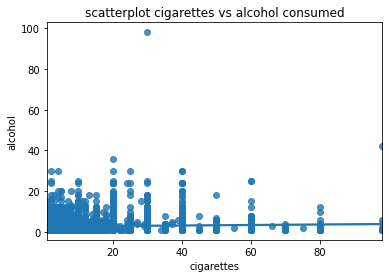

In [157]:
scat=seaborn.regplot(x="cigarettes",y="alcohol",fit_reg=True,data=df)
plt.title('scatterplot cigarettes vs alcohol consumed')

In [159]:
print('association between cigarettes and alcohol')
print(scipy.stats.pearsonr(df['cigarettes'],df['alcohol']))
print()
print('THERE IS A SMALL ASSOCIATION BETWEEN SMOKING CIGARETTES AND CONSUMING A LARGE AMOUNT OF ALCOHOL BECAUSE R=0.053 ')
print('p-value is 1.3*e-09<<0.05 so the relationship is statistically significant')

association between cigarettes and alcohol
(0.053841297867649074, 1.3023416843327548e-09)

THERE IS A SMALL ASSOCIATION BETWEEN SMOKING CIGARETTES AND CONSUMING A LARGE AMOUNT OF ALCOHOL BECAUSE R=0.053 
p-value is 1.3*e-09<<0.05 so the relationship is statistically significant
